In [2]:
import pandas as pd
import numpy as np

# Lets learn some pandas

In [3]:
dataframe = {
    "X" : [1, 2, 4, 6, 12, 15, 25, 45, 68, 67, 65, 98]
} 

X = np.array([1, 2, 4, 6, 12, 15, 25, 45, 68, 67, 65, 98])
S = pd.Series([1, 2, 4, 6, 12, 15, 25, 45, 68, 67, 65, 98])

print("X:", X)
print ("S:", S)
print("Mean(S):", S.mean())

print ("Std(S):", S.std())

X: [ 1  2  4  6 12 15 25 45 68 67 65 98]
S: 0      1
1      2
2      4
3      6
4     12
5     15
6     25
7     45
8     68
9     67
10    65
11    98
dtype: int64
Mean(S): 34.0
Std(S): 33.22923138114721


# Lets learn some statistics

In [4]:
X1 = pd.Series([0, 8, 12, 20])
X2 = pd.Series([8, 9, 11, 12])

print ("Std(X1):", X1.std())
print ("Std(X2):", X2.std())
print ("Var(X1):", X1.var())
print ("Var(X2):", X2.var())

studyFrame = {
    "Hours": [9, 15, 25, 14, 10, 18, 0, 16, 5, 19, 16, 20],
    "Marks": [39, 56, 93, 61, 50, 75, 32, 85, 42, 70, 66, 80]
}

study = pd.DataFrame(studyFrame)
print ("Cov(study):", study.cov())
print ("Var(study(Hours)):", study["Hours"].var())
print ("Var(study(Marks)):", study["Marks"].var())

Std(X1): 8.32666399786453
Std(X2): 1.8257418583505538
Var(X1): 69.33333333333333
Var(X2): 3.3333333333333335
Cov(study):             Hours       Marks
Hours   47.719697  122.946970
Marks  122.946970  370.083333
Var(study(Hours)): 47.71969696969697
Var(study(Marks)): 370.08333333333337


# Lets learn some PCA
* We took the two vectors `x` and `y`.
* We standardized the data using `StandardScaler`. Note that the library returns a numpy multi-dimensional array and not a pandas data frame.
* We than apply PCA to transform vectors and retrieve two principal components of these vectors. Note that the maximum number of components we can derive are equal to the number of features we had in the original data (2 in this case).
* Finally, we look at the variation present in each of the components to understand which are the dominant components using `pca.explained_variance_ratio_`. In this particular example turns out almost 96% of the variation is captured by the first component and so we actually don't have to worry about the remainder of the components.


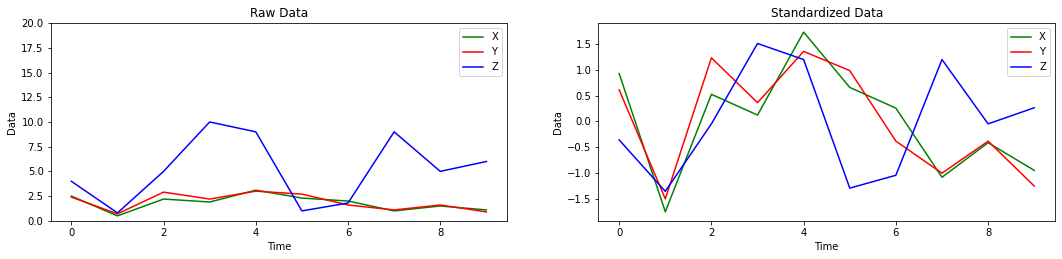

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dataframe = {
    "x": [2.5, .5, 2.2, 1.9, 3.1, 2.3, 2,   1,   1.5, 1.1], #2.5, .5, 2.2, 1.9, 3.1, 2.3  , 2,   1,   1.5, 1.1,],
    "y": [2.4, 0.7,2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9], #2.4, 0.7,2.9, 2.2, 3.0, 2.7  , 1.6, 1.1, 1.6, 0.9,],
    "z": [4.0, 0.8, 5,   10,  9,   1,  1.8, 9,   5,   6] #4.0, 0.8, 5,   10,  9,   1,  1.8, 9,   5,   6,]
}
data = pd.DataFrame(dataframe)
fig = plt.figure(figsize=(18,8))
subplot = fig.add_subplot(221)
subplot.plot(data.index.values, data["x"], 'g', label="X")
subplot.plot(data.index.values, data["y"], 'r', label="Y")
subplot.plot(data.index.values, data["z"], 'b', label="Z")
subplot.set_ylim(0, 20)
subplot.set_title("Raw Data")

subplot.set_xlabel("Time")
subplot.set_ylabel("Data")
subplot.legend()



# Normalize the dataset.
standardizedFrame = StandardScaler().fit_transform(data)

# `StandardScaler` returns a `numpy` array so need to re-create  the data-frame from the standardized data for pretty printing. 
# We technically don't need the standardized data to run PCA.
standardized = pd.DataFrame(standardizedFrame, columns=["x", "y", "z"])
#print ("Standardized:", standardized)


subplot = fig.add_subplot(222)
subplot.plot(standardized.index.values, standardized["x"], 'g', label="X")
subplot.plot(standardized.index.values, standardized["y"], 'r', label="Y")
subplot.plot(standardized.index.values, standardized["z"], 'b', label="Z")
#subplot.set_ylim(0, 2)
subplot.set_title("Standardized Data")

plt.xlabel("Time")
plt.ylabel("Data")
plt.legend()
plt.show()

# Introduce some anomalies.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


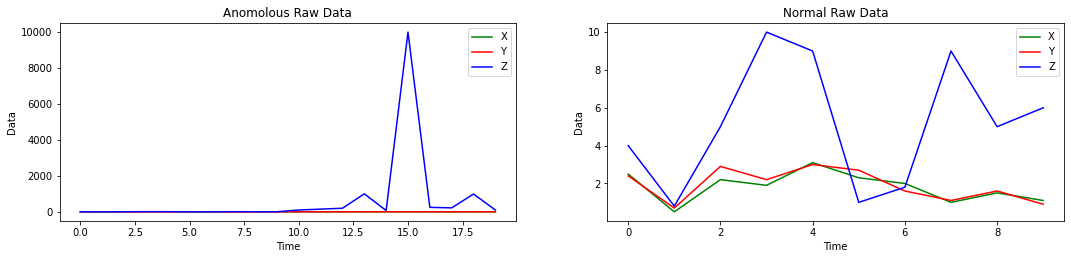

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

an_dataframe = {
    "x": [2.5, .5, 2.2, 1.9, 3.1, 2.3, 2,   1,   1.5, 1.1, 2.5, .5, 2.2, 1.9, 3.1, 2.3  , 2,   1,   1.5, 1.1,],
    "y": [2.4, 0.7,2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9, 2.4, 0.7,2.9, 2.2, 3.0, 2.7  , 1.6, 1.1, 1.6, 0.9,],
    "z": [4.0, 0.8, 5,   10,  9,   1,  1.8, 9,   5,   6,   100, 150,200, 1000, 75, 10000, 250, 220, 990, 100]
}

an_data = pd.DataFrame(an_dataframe)

an_fig = plt.figure(figsize=(18,8))
an_subplot = an_fig.add_subplot(221)
an_subplot.plot(an_data.index.values, an_data["x"], 'g', label="X")
an_subplot.plot(an_data.index.values, an_data["y"], 'r', label="Y")
an_subplot.plot(an_data.index.values, an_data["z"], 'b', label="Z")
#subplot.set_ylim(0, 20)
an_subplot.set_title("Anomolous Raw Data")

an_subplot.set_xlabel("Time")
an_subplot.set_ylabel("Data")
an_subplot.legend()

# Plot the normal data
an_subplot = an_fig.add_subplot(222)
an_subplot.plot(data.index.values, data["x"], 'g', label="X")
an_subplot.plot(data.index.values, data["y"], 'r', label="Y")
an_subplot.plot(data.index.values, data["z"], 'b', label="Z")
#subplot.set_ylim(0, 20)
an_subplot.set_title("Normal Raw Data")

an_subplot.set_xlabel("Time")
an_subplot.set_ylabel("Data")
an_subplot.legend()

# Normalize the dataset.
an_standardizedFrame = StandardScaler().fit_transform(an_data)
# `StandardScaler` returns a `numpy` array so need to re-create  the data-frame from the standardized data for pretty printing. 
# We technically don't need the standardized data to run PCA.
an_standardized = pd.DataFrame(an_standardizedFrame, columns=["x", "y", "z"])
an_subplot = fig.add_subplot(222)
an_subplot.plot(an_standardized.index.values, an_standardized["x"], 'g', label="X")
an_subplot.plot(an_standardized.index.values, an_standardized["y"], 'r', label="Y")
an_subplot.plot(an_standardized.index.values, an_standardized["z"], 'b', label="Z")
#subplot.set_ylim(0, 2)
an_subplot.set_title("Standardized Data")

plt.xlabel("Time")
plt.ylabel("Data")
plt.legend()
plt.show()



# Run the PCA
pca = PCA(n_components=3)



# Inspect PCA for original and anomolous data.

Variation (Raw Data):  [0.65926364 0.31606027 0.02467609]
Variation (Anomolous):  [0.66399376 0.31251942 0.02348682]


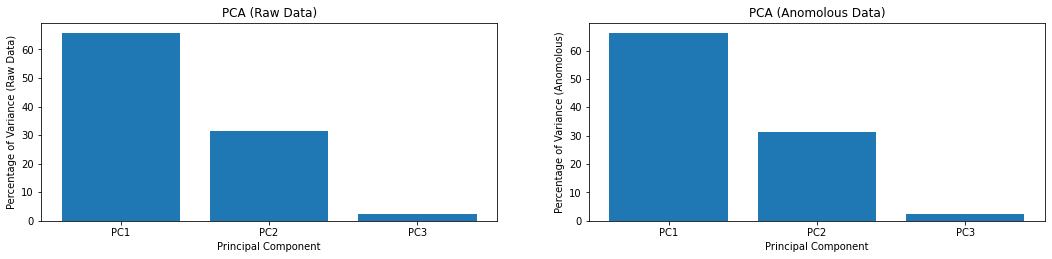

In [45]:
# Run the PCA
raw_pca = PCA(n_components=3)

raw_principalComponents = raw_pca.fit_transform(standardizedFrame)

# Retrieve the two components.
raw_principalDataFrame = pd.DataFrame(data = raw_principalComponents, columns = ['PC1', 'PC2', 'PC3'])


# Check the variation.
print ("Variation (Raw Data): ", raw_pca.explained_variance_ratio_)

# Run PCA on anomolous
an_pca = PCA(n_components=3)
an_principalComponents = an_pca.fit_transform(an_standardizedFrame)

# Retrieve the two components.
an_principalDataFrame = pd.DataFrame(data = an_principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Check the variation.
print ("Variation (Anomolous): ", an_pca.explained_variance_ratio_)

raw_percent_variance = np.round(raw_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']
raw_pca_fig = plt.figure(figsize=(18,8))
raw_pca_subplot = raw_pca_fig.add_subplot(221)
raw_pca_subplot.bar(x= range(1,4), height=raw_percent_variance, tick_label=columns)
raw_pca_subplot.set_ylabel('Percentage of Variance (Raw Data)')
raw_pca_subplot.set_xlabel('Principal Component')
raw_pca_subplot.set_title('PCA (Raw Data)')


an_percent_variance = np.round(an_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']
an_pca_subplot = raw_pca_fig.add_subplot(222)
an_pca_subplot.bar(x= range(1,4), height=an_percent_variance, tick_label=columns)
an_pca_subplot.set_ylabel('Percentage of Variance (Anomolous)')
an_pca_subplot.set_xlabel('Principal Component')
an_pca_subplot.set_title('PCA (Anomolous Data)')
plt.show()

# Inspecting FFT of the raw data.
* Instead of running PCA on the raw data we will run PCA on the energy associated with different frequencies on the raw data.
* We apply FFT to the raw data and get energy levels at 100 different frequency intervals ranging [0, F), where is the sampling frequency of the raw data.

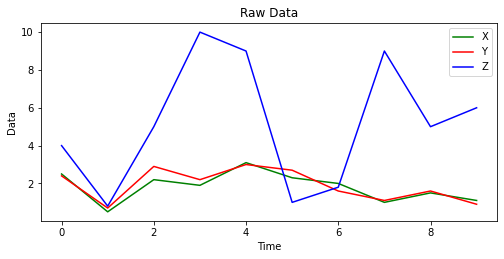

In [46]:
import scipy as sp
import scipy.fftpack
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


fft_data = pd.DataFrame(dataframe)
fft_fig = plt.figure(figsize=(18,8))
fft_subplot = fft_fig.add_subplot(221)
fft_subplot.plot(fft_data.index.values, fft_data["x"], 'g', label="X")
fft_subplot.plot(fft_data.index.values, fft_data["y"], 'r', label="Y")
fft_subplot.plot(fft_data.index.values, fft_data["z"], 'b', label="Z")
fft_subplot.set_title("Raw Data")

fft_subplot.set_xlabel("Time")
fft_subplot.set_ylabel("Data")
fft_subplot.legend()

plt.show()



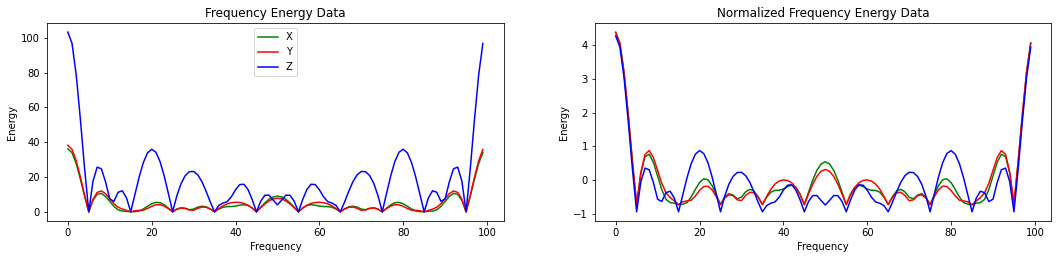

In [38]:
fft_x = sp.fftpack.fft(fft_data["x"].values.tolist(), 100)
fft_x_abs = np.absolute(fft_x)
fft_y = sp.fftpack.fft(fft_data["y"].values.tolist(), 100)
fft_y_abs = np.absolute(fft_y)
fft_z = sp.fftpack.fft(fft_data["z"].values.tolist(), 100)
fft_z_abs = np.absolute(fft_z)


# Build a new data-frame with the fft
fftEnergyDataFrame = {
    "x": fft_x_abs,
    "y": fft_y_abs,
    "z": fft_z_abs
}

fftEnergyData = pd.DataFrame(fftEnergyDataFrame)
fft_energy_fig = plt.figure(figsize=(18,8))
fft_energy_subplot = fft_energy_fig.add_subplot(221)
fft_energy_subplot.plot(fftEnergyData.index.values, fftEnergyData["x"], 'g', label="X")
fft_energy_subplot.plot(fftEnergyData.index.values, fftEnergyData["y"], 'r', label="Y")
fft_energy_subplot.plot(fftEnergyData.index.values, fftEnergyData["z"], 'b', label="Z")
fft_energy_subplot.set_title("Frequency Energy Data")

fft_energy_subplot.set_xlabel("Frequency")
fft_energy_subplot.set_ylabel("Energy")
fft_energy_subplot.legend()


# Normalize the dataset.
fft_standardizedFrame = StandardScaler().fit_transform(fftEnergyData)

# `StandardScaler` returns a `numpy` array so need to re-create  the data-frame from the standardized data for pretty printing. 
# We technically don't need the standardized data to run PCA.
fft_standardized = pd.DataFrame(fft_standardizedFrame, columns=["x", "y", "z"])
fft_energy_subplot = fft_energy_fig.add_subplot(222)
fft_energy_subplot.plot(fft_standardized.index.values, fft_standardized["x"], 'g', label="X")
fft_energy_subplot.plot(fft_standardized.index.values, fft_standardized["y"], 'r', label="Y")
fft_energy_subplot.plot(fft_standardized.index.values, fft_standardized["z"], 'b', label="Z")

fft_energy_subplot.set_title("Normalized Frequency Energy Data")

fft_energy_subplot.set_xlabel("Frequency")
fft_energy_subplot.set_ylabel("Energy")
plt.show()




# Similar to the raw data, lets analyze the FFT of the anomolous data.

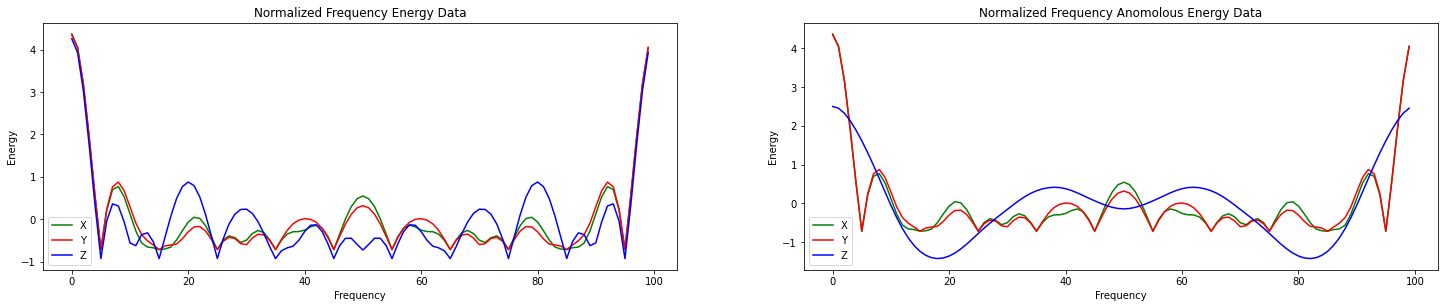

In [69]:
import scipy as sp
import scipy.fftpack
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

an_data = pd.DataFrame(an_dataframe)

an_fft_x = sp.fftpack.fft(an_data["x"].values.tolist(), 100)
an_fft_x_abs = np.absolute(an_fft_x)
an_fft_y = sp.fftpack.fft(an_data["y"].values.tolist(), 100)
an_fft_y_abs = np.absolute(an_fft_y)
an_fft_z = sp.fftpack.fft(an_data["z"].values.tolist(), 100)
an_fft_z_abs = np.absolute(an_fft_z)

# Build a new data-frame with the fft
an_fftDataFrame = {
    "x": an_fft_x_abs,
    "y": an_fft_y_abs,
    "z": an_fft_z_abs
}

an_fftData = pd.DataFrame(an_fftDataFrame)

fig = plt.figure(figsize=(25,10))

# Normalize the dataset.
fft_an_standardizedFrame = StandardScaler().fit_transform(an_fftData)

# We technically don't need the standardized data to run PCA.
fft_an_standardized = pd.DataFrame(fft_an_standardizedFrame, columns=["x", "y", "z"])
an_subplot = fig.add_subplot(221)
an_subplot.plot(fft_standardized.index.values, fft_standardized["x"], 'g', label="X")
an_subplot.plot(fft_standardized.index.values, fft_standardized["y"], 'r', label="Y")
an_subplot.plot(fft_standardized.index.values, fft_standardized["z"], 'b', label="Z")

an_subplot.set_title("Normalized Frequency Energy Data")

an_subplot.set_xlabel("Frequency")
an_subplot.set_ylabel("Energy")
an_subplot.legend()



# Plot the non-anomolous data.
an_subplot = fig.add_subplot(222)
an_subplot.plot(fft_an_standardized.index.values, fft_an_standardized["x"], 'g', label="X")
an_subplot.plot(fft_an_standardized.index.values, fft_an_standardized["y"], 'r', label="Y")
an_subplot.plot(fft_an_standardized.index.values, fft_an_standardized["z"], 'b', label="Z")

an_subplot.set_title("Normalized Frequency Anomolous Energy Data")

an_subplot.set_xlabel("Frequency")
an_subplot.set_ylabel("Energy")
an_subplot.legend()



plt.show()



The figures above show the "normalized" frequency spectrum of the raw data and the anomolous data.

Variation (FFT Energy):  [0.94355479 0.05429187 0.00215334]
Variation (FFT Anomolous Energy):  [0.87115586 0.12663701 0.00220713]


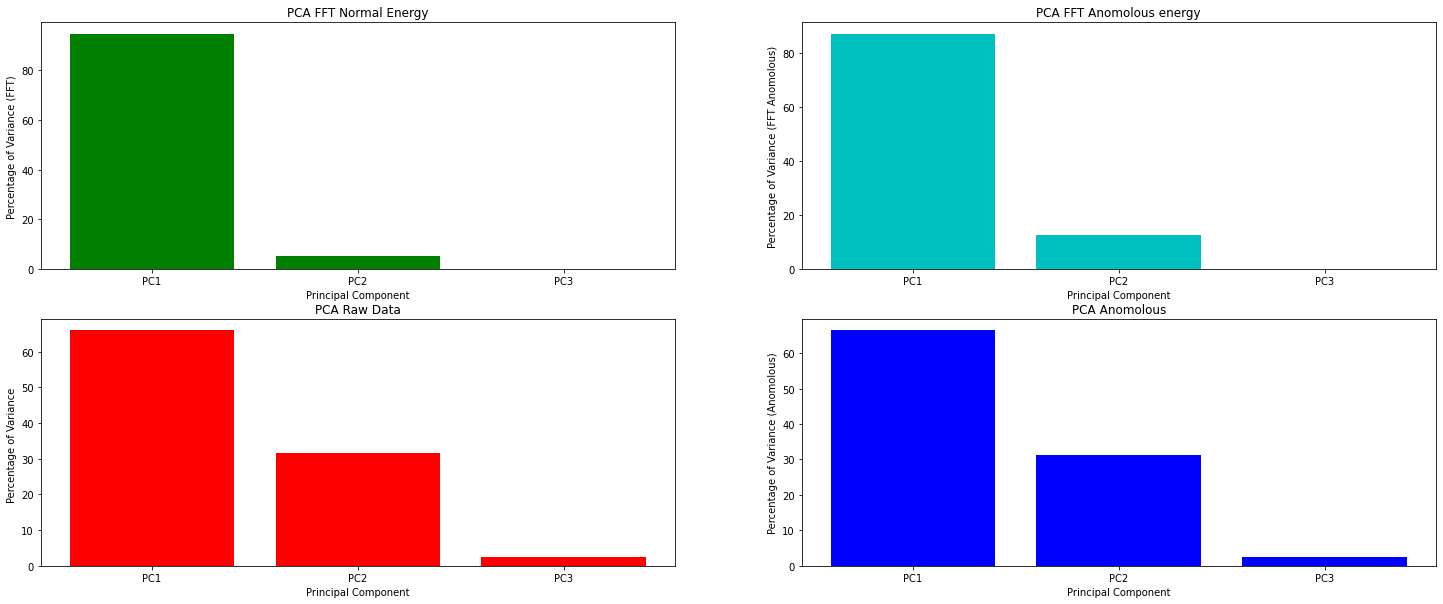

In [64]:
#Run the PCA
fft_pca = PCA(n_components=3)

fft_principalComponents = fft_pca.fit_transform(fft_standardizedFrame)

fft_an_pca = PCA(n_components=3)

fft_an_principalComponents = fft_an_pca.fit_transform(fft_an_standardizedFrame)


# Check the variation.
print ("Variation (FFT Energy): ", fft_pca.explained_variance_ratio_)
print ("Variation (FFT Anomolous Energy): ", fft_an_pca.explained_variance_ratio_)

# Plot the PCA components for normal and anomolous PCA.
fft_percent_variance = np.round(fft_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']
fig = plt.figure(figsize=(25,10))
an_subplot = fig.add_subplot(221)
an_subplot.bar(x= range(1,4), height=fft_percent_variance, tick_label=columns, color='g')

an_subplot.set_ylabel('Percentage of Variance (FFT)')
an_subplot.set_xlabel('Principal Component')
an_subplot.set_title('PCA FFT Normal Energy')


fft_an_percent_variance = np.round(fft_an_pca.explained_variance_ratio_* 100, decimals =2)
an_subplot = fig.add_subplot(222)
an_subplot.bar(x= range(1,4), height=fft_an_percent_variance, tick_label=columns, color='c')
an_subplot.set_ylabel('Percentage of Variance (FFT Anomolous)')
an_subplot.set_xlabel('Principal Component')
an_subplot.set_title('PCA FFT Anomolous energy')

an_subplot = fig.add_subplot(223)
an_subplot.bar(x= range(1,4), height=raw_percent_variance, tick_label=columns, color='r')
an_subplot.set_ylabel('Percentage of Variance ')
an_subplot.set_xlabel('Principal Component')
an_subplot.set_title('PCA Raw Data')

an_subplot = fig.add_subplot(224)
an_subplot.bar(x= range(1,4), height=an_percent_variance, tick_label=columns, color='b')
an_subplot.set_ylabel('Percentage of Variance (Anomolous)')
an_subplot.set_xlabel('Principal Component')
an_subplot.set_title('PCA Anomolous')



plt.show()

The figure above compares the PCA obtained by analyzing PCA components of the energy specturm of the raw and anomolous data, and the PCA components of the raw and anomouls data themsevles. As can be seen the PCA components of the raw and anomolous data looks almost identical, but the PCA components of the energy spectrum start showing differences.